# NLP Analysis on Religious Texts

Keith Kwong, 4/9/21 for DataHacks 2021

## Goal

Data science my way through religous texts

## Links

Task Document
- http://localhost:8888/files/datahacks_21/datahacks2021/resources/DataHacks-2021/Beginner%20Track/Beginner%20Prompt.pdf
- http://www.google.com/url?q=http%3A%2F%2Fdatahub.ucsd.edu&sa=D&sntz=1&usg=AFQjCNE_LygO6riQ5-xNsqbJUN0gtJTm_g (DSC NBs)
- https://huggingface.co/transformers/quicktour.html (transformers documentation)
- https://www.youtube.com/watch?v=0Lt9w-BxKFQ (sklearn tutorial)
- https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html#extracting-features-from-text-files (sklearn text data documentation)

## Random Brainstorming

- NLTK
- Average word length
- most common words
- average time of words

## Random book research

### Book of Eccleasiasticus
- book in the Roman Catholic's Bible
- not in all bibles
- Apocrypha / Deuterocanonical
- originally in Hebrew
- contents mostly contain: advice on wide variety of topics, praises of Lord's wisdom
- https://www.gotquestions.org/book-of-Ecclesiasticus.html

### Book of Ecclesiastes
- in Old Testament
- compare with book of proverbs/wisdom

In [74]:
# imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [89]:
# read data

data_test = pd.read_csv("data/Religious_text_test.csv")
data_train = pd.read_csv('data/Religious_text_train.csv')

In [101]:
# get rid of chapters, combine data from all chapters

def rid_chapter(title):
    only_title = title.split('_')[0]
    return only_title

data_work = data_train.rename(columns = {"Unnamed: 0": "Title"})
data_work["Title"] = data_work.get('Title').apply(rid_chapter)
data_work_combined = data_work.groupby(["Title"]).sum()
data_work_combined

,foolishness,hath,wholesome,takest,feelings,anger,vaivaswata,matrix,kindled,convict,...,erred,thinkest,modern,reigned,sparingly,visual,thoughts,illumines,attire,explains
Title,,,,,,,,,,,,,,,,,,,,,
BookOfEccleasiasticus,0,189,3,1,0,14,0,0,3,0,...,0,0,0,1,1,0,7,0,2,0
BookOfEcclesiastes,0,46,0,0,0,5,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
BookOfProverb,2,65,0,0,0,11,0,0,0,0,...,0,0,0,0,0,0,8,0,1,0
BookOfWisdom,0,32,0,0,0,1,0,0,0,1,...,2,0,0,0,0,0,7,0,0,0
Buddhism,0,0,0,0,19,0,0,0,0,0,...,0,0,0,0,0,0,9,0,0,0
TaoTeChing,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Upanishad,0,0,0,0,0,3,1,0,1,0,...,0,3,0,0,0,0,2,1,0,1
YogaSutra,0,2,1,0,0,0,0,1,0,0,...,0,0,2,0,0,1,14,4,0,1


In [115]:
# function that plots in a bar graph the 20 most used words in the given book
def find_20_max(title):
    lst_word = []
    lst_count = []
    data_copy = data_work_combined.copy()
    df = pd.DataFrame()
    for i in range(20):
        temp_max_word = data_copy.loc[title].idxmax()
        temp_max = data_copy.loc[title].max()
        lst_word += [temp_max_word]
        lst_count += [temp_max]
        data_copy = data_copy.drop(columns=[temp_max_word])
    df = df.assign(
        Word = lst_word,
        count = lst_count
    ).sort_values(by='count')
    df.plot(kind='barh',x='Word',title='20 most used words in ' + title)

# the twenty most common words for all the 8 books
# title_lst = list(data_work_combined.reset_index().get('Title'))
# for title in title_lst:
#     find_20_max(title)

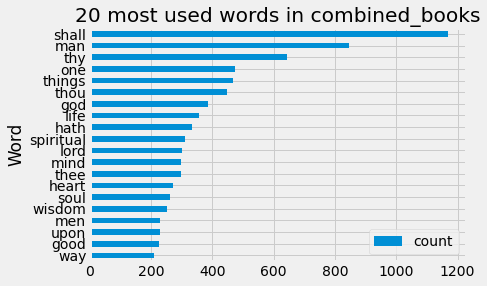

In [114]:
# top words that appear in all books combined

all_books = data_work_combined.reset_index()
all_books = all_books.assign(
    Title = all_books.get('Title').apply(lambda title: "combined_books")
).groupby('Title').sum()
data_work_combined = data_work_combined.append(all_books)
all_books_20 = find_20_max('combined_books')

# First Prompt: Comparing books in Old Testament

In [122]:
# grab only old testament books

only_old = data_work_combined.reset_index()
only_old = only_old[only_old['Title'].isin(['BookOfEcclesiastes','BookOfProverb','BookOfWisdom'])]
only_old

,Title,foolishness,hath,wholesome,takest,feelings,anger,vaivaswata,matrix,kindled,...,erred,thinkest,modern,reigned,sparingly,visual,thoughts,illumines,attire,explains
1,BookOfEcclesiastes,0,46,0,0,0,5,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,BookOfProverb,2,65,0,0,0,11,0,0,0,...,0,0,0,0,0,0,8,0,1,0
3,BookOfWisdom,0,32,0,0,0,1,0,0,0,...,2,0,0,0,0,0,7,0,0,0
